In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import yfinance as yf
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
data=yf.download('AAPL',start='2020-01-01',end='2023-01-01')
print(data.head())
data.to_csv('AAPL.csv')
print("data saved to 'AAPL.csv'.")

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796036  72.856628  71.545402  71.799888  135480400
2020-01-03  72.088295  72.851761  71.862892  72.020432  146322800
2020-01-06  72.662720  72.701500  70.954010  71.206077  118387200
2020-01-07  72.320976  72.929322  72.100418  72.672409  108872000
2020-01-08  73.484360  73.787323  72.022865  72.022865  132079200
data saved to 'AAPL.csv'.


In [7]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data[['Close']])
print(data['Close'])
print(data_scaled)
x=data_scaled[:-1]
y=data_scaled[1:]
print(x)
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"training set size: {len(X_train)}")
print(f"testing set size: {len(X_test)}")

Ticker            AAPL
Date                  
2020-01-02   72.796036
2020-01-03   72.088295
2020-01-06   72.662720
2020-01-07   72.320976
2020-01-08   73.484360
...                ...
2022-12-23  130.487808
2022-12-27  128.676849
2022-12-28  124.728371
2022-12-29  128.261230
2022-12-30  128.577881

[756 rows x 1 columns]
[[0.14679896]
 [0.14111734]
 [0.14572872]
 [0.14298526]
 [0.1523247 ]
 [0.16485506]
 [0.1662169 ]
 [0.17911713]
 [0.17078944]
 [0.16818214]
 [0.17577033]
 [0.18256101]
 [0.17835815]
 [0.18055687]
 [0.18353368]
 [0.18174373]
 [0.16353193]
 [0.18053746]
 [0.19347628]
 [0.19256186]
 [0.16462159]
 [0.16296778]
 [0.18279449]
 [0.18785328]
 [0.19516916]
 [0.18656825]
 [0.18953268]
 [0.18574919]
 [0.20055195]
 [0.19600776]
 [0.19616376]
 [0.18455933]
 [0.19356981]
 [0.18709479]
 [0.17295491]
 [0.14395365]
 [0.12425519]
 [0.13316822]
 [0.09585857]
 [0.09554639]
 [0.14518227]
 [0.12667367]
 [0.15284695]
 [0.13369483]
 [0.12610793]
 [0.08152373]
 [0.1189113 ]
 [0.09958351]
 [0.0

In [8]:
from threading import active_count
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


training and evaluation

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3802 - mae: 0.5670 - val_loss: 0.1917 - val_mae: 0.3895
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1518 - mae: 0.3551 - val_loss: 0.0579 - val_mae: 0.2088
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0360 - mae: 0.1648 - val_loss: 0.0084 - val_mae: 0.0760
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053 - mae: 0.0554 - val_loss: 0.0070 - val_mae: 0.0646
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052 - mae: 0.0547 - val_loss: 0.0059 - val_mae: 0.0621
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039 - mae: 0.0486 - val_loss: 0.0047 - val_mae: 0.0540
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0032 - mae: 0.0428 - val_loss: 0.0038 - val_mae: 0.0498
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - mae: 0.0419 - val_loss: 0.0029 - val_mae: 0.0419
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.002

In [10]:
loss, mae = model.evaluate(X_test, y_test)
print(f"test loss :{loss}")
print(f"test mae :{mae}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3515e-04 - mae: 0.0185 
test loss :0.0005943433498032391
test mae :0.017824480310082436


predictions

In [11]:
predictions = model.predict(X_test)
results_df=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":predictions.flatten(),})
results_df['Error']=results_df['Actual']-results_df['Predicted']

original_test=results_df
original_test=scaler.inverse_transform(original_test)
original_test=pd.DataFrame(original_test,columns=['Actual','Predicted','Error'])
original_test.to_csv('original test.csv',index=False)
print("original test saved to 'original test.csv'.")
print(results_df)




5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
original test saved to 'original test.csv'.
       Actual  Predicted     Error
0    0.546071   0.567985 -0.021914
1    0.897993   0.914959 -0.016966
2    0.145182   0.101707  0.043476
3    0.114289   0.104302  0.009987
4    0.922990   0.958329 -0.035339
..        ...        ...       ...
146  0.712714   0.694811  0.017903
147  0.589898   0.574427  0.015471
148  0.164047   0.173086 -0.009038
149  0.722703   0.787517 -0.064814
150  0.414784   0.416170 -0.001386

[151 rows x 3 columns]


In [12]:
results_df.to_csv('predicted_results.csv',index=False)
print ("predictions and error saved to 'predictions_results.csv'.")

predictions and error saved to 'predictions_results.csv'.


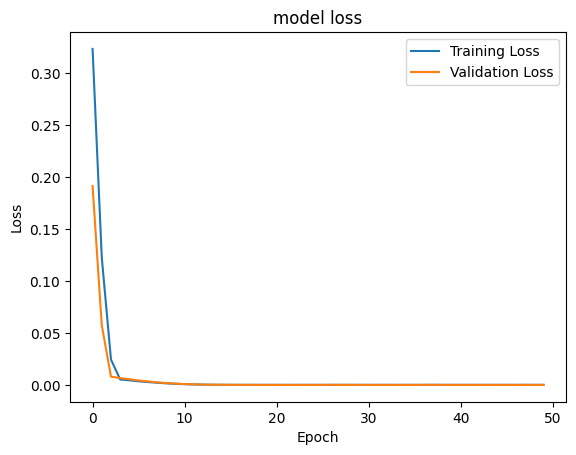

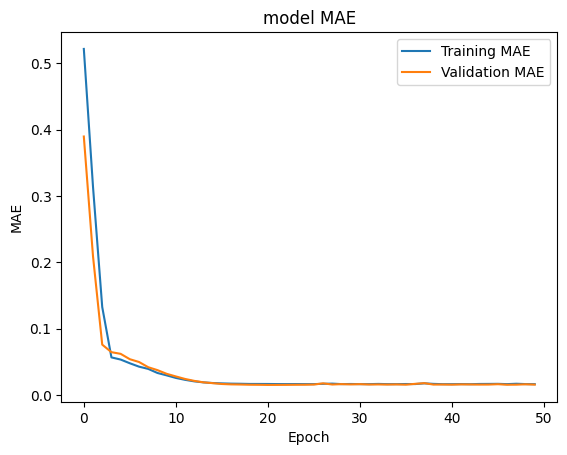

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

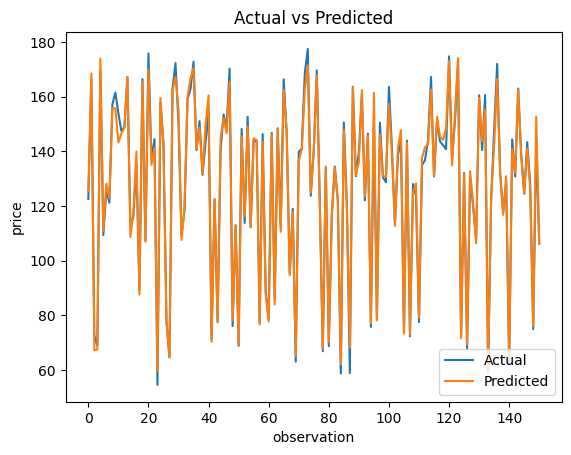

In [15]:
plt.plot(original_test['Actual'], label='Actual')
plt.plot(original_test['Predicted'], label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('observation')
plt.ylabel('price')
plt.legend()
plt.show()